# Dec 9

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['mathtext.fontset'] = 'cm'


### These functions may be used universally.

In [3]:
def arrange_cols(df: pd.DataFrame, is_train=False):
    '''
    Rearrange columns into the order in the data description.
    '''
    if is_train:
        df = df[[
            'fit', 'item_name', 'size', 'price', 'user_name', 'rented_for',
            'usually_wear', 'age', 'height', 'weight', 'body_type',
            'bust_size', 'review_summary', 'review', 'rating'
        ]].copy()
        return df
    else:
        df = df[[
            'fit', 'item_name', 'size', 'price', 'rented_for', 'usually_wear',
            'age', 'height', 'weight', 'body_type', 'bust_size'
        ]].copy()
        return df


def drop_ufeff(df: pd.DataFrame):
    '''
    Drop the rows corrupted by the byte-order mark '\udeff' in the data.
    '''
    df.drop(df[df.item_name.str.contains('\ufeff')].index, inplace=True)
    return df


def empty_to_nan(df: pd.DataFrame):
    '''
    Convert empty strings to NaN.
    '''
    df.replace('', np.nan, inplace=True)
    return df


def preprocess(df: pd.DataFrame, is_train=False):
    '''
    Preprocess the data, Yunqin Zhu's version.
    '''
    df = arrange_cols(df, is_train)
    df = drop_ufeff(df)
    df = empty_to_nan(df)
    return df

In [221]:
# Load datasets
train_df = pd.read_json('../data/train_data.json')
train_df = preprocess(train_df, is_train=True)
train_df.sample(5)

,fit,item_name,size,price,user_name,rented_for,usually_wear,age,height,weight,body_type,bust_size,review_summary,review,rating
52951,True to Size,7 For All Mankind\nFaux Leather Joggers,S,$228,Megan,Everyday,2,45,"5' 7""",125LBS,FULL BUST,32D,Liked them but,The inside lining sorta stuck to my legs which...,4
74276,NaN,NOIZE\nPink Estelle Faux Fur Coat,S,$267,Kelsey jo,Other,10,35,"5' 4""",NaN,NaN,36DDD/E,Size down,NaN,4
68859,NaN,A.L.C.\nKeegan Top,12,$345,Rachel,Party,12,37,"5' 6""",180LBS,HOURGLASS,36G,Not for me,The top itself is cute and fits well but I hav...,3
87002,NaN,Sosken\nFaux Sherpa June Puffer Jacket,L,$598,Alison,Everyday,4,37,"5' 4""",129LBS,ATHLETIC,34D,Fun jacket,I wanted a warm and different jacket. Sized up...,4
15456,True to Size,Black Halo\nCash Velvet Jumpsuit,4R,$415,Lily,Wedding,4,37,"5' 7""",145LBS,ATHLETIC,34DD,"Comfortable, stylish, lots of compliments",Loved this jumpsuit. Officiated a wedding in i...,5


<AxesSubplot: ylabel='body_type'>

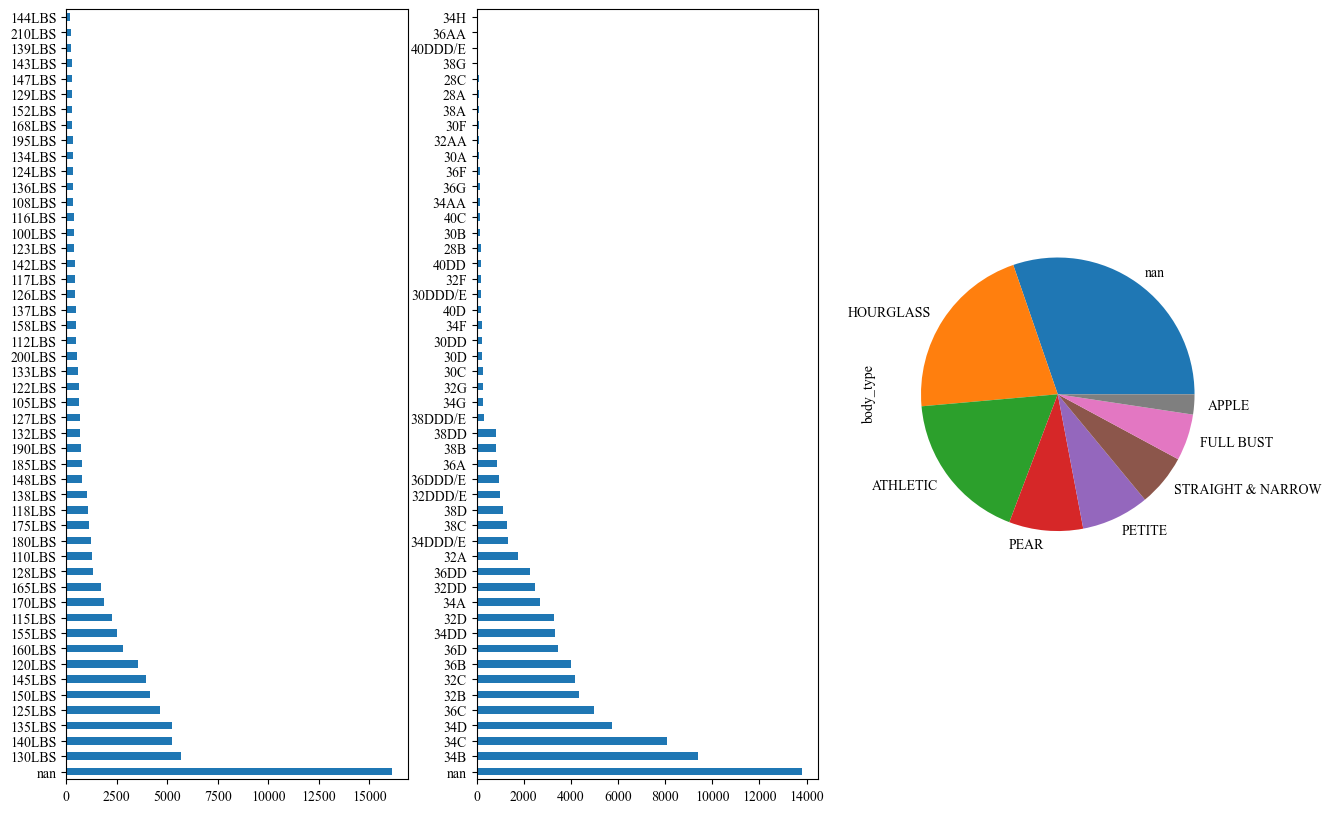

In [220]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
train_df.weight.value_counts(dropna=False).sort_values(ascending=False).head(50).plot(kind='barh', ax=ax[0])
train_df.bust_size.value_counts(dropna=False).sort_values(ascending=False).head(50).plot(kind='barh', ax=ax[1])
train_df.body_type.value_counts(dropna=False).sort_values(ascending=False).head(50).plot(kind='pie', ax=ax[2])

## height

- Most of the heights match the format `^\d+' \d+"$`. We assume that they are in feet and inches and convert them to centimeters for convenience.
- Among the 83 entries that do not match, 81 have their review summaries duplicated in the height column, while the other 2 have their item names. We assume that their heights are missing and set them to `NaN`.
- Height bigger than 200 cm is considered to be abnormal and set to `NaN`.

In [83]:
df = train_df.copy()

In [84]:
df.height = df.height.astype(str, copy=False)

err_df = df[~df.height.str.match(r'^\d+\' \d+\"$')
                  & (df.height != 'nan')]
err_df.sample(5)

,fit,item_name,size,price,user_name,rented_for,usually_wear,age,height,weight,body_type,bust_size,review_summary,review,rating
23275,True to Size,Christian Siriano\nRed Cold Shoulder Top,10,$510,RTR Customer,Date,10,https://r-ap.rtrcdn.com/reviewimages/de3/12543...,This was worn for a girls' night out for my bi...,NaN,NaN,NaN,This was worn for a girls' night out for my bi...,The fit of this shirt is fantastic for me. I a...,5
36412,Small,A.L.C.\nMariel Sweater,M,$345,RTR Customer,Everyday,47,NaN,Didn't wear it. Crazy short in arms and torso.,NaN,NaN,NaN,Didn't wear it. Crazy short in arms and torso.,This is not as pictured. Sleeves are bracelet ...,1
51475,True to Size,Boden\nBetsy Skirt,None,$120,Jessica,Everyday,4,NaN,didn't wear it,NaN,NaN,NaN,didn't wear it,fabric too heavy for season\n,1
62554,Small,Rebecca Minkoff\nShelley Sweater,None,$198,Catherine,Everyday,2,NaN,Too small didn't wear it,NaN,NaN,NaN,Too small didn't wear it,Great in theory!,3
77530,True to Size,Saylor\nMetallic Kori Jumpsuit,XSR,$253,RTR Customer,Party,0,NaN,Didn't wear it,NaN,NaN,NaN,Didn't wear it,great color.\ngood fit.\nthe pleats made my hi...,3


In [85]:
print(len(err_df))
print(err_df['height'].to_markdown())

83
|       | height                                                                                               |
|------:|:-----------------------------------------------------------------------------------------------------|
|  1638 | The fabric is metallic which made it itch.  Didn't end up wearing it to the event.                   |
|  2004 | Very Small, this is not true to size. i couldn't even wear it. The material was very tight. No give. |
|  3438 | I didn't wear it.                                                                                    |
|  5513 | didn't wear                                                                                          |
|  6470 | This was so comfortable! Can't wait to rent again.                                                   |
|  6553 | I didn't wear this to an event                                                                       |
|  7206 | New Year's Eve Party                                                               

In [86]:
err_df[err_df.height != err_df.review_summary]

,fit,item_name,size,price,user_name,rented_for,usually_wear,age,height,weight,body_type,bust_size,review_summary,review,rating
43643,True to Size,BB Dakota\nCan't Knit With Us Skirt,LR,$98,RTR Customer,Everyday,12,$98,Can't Knit With Us Skirt,NaN,NaN,NaN,great!,Fits true to size- such a great skirt. I bough...,5
76635,NaN,Levi's\nAtlas Sherpa Jacket,NaN,$90,NaN,NaN,NaN,https://pc-ap.rtrcdn.com/productimages/nomodel...,Levi's\nAtlas Sherpa Jacket,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
pos = df.height.str.match(r'^\d+\' \d+\"$')
# Set invalid values to NaN
df.loc[~pos, 'height'] = np.nan
# Convert feet and inches to centimeters
temp = df.height[pos].str.extract(r'(\d+)\' (\d+)\"').astype(int, copy=False)
df.loc[pos, 'height'] = (temp[0] * 12 + temp[1]) * 2.54
df.height = df.height.astype(float, copy=False)
df.height.describe()

count    55984.000000
mean       165.946062
std          6.690402
min        137.160000
25%        162.560000
50%        165.100000
75%        170.180000
max        297.180000
Name: height, dtype: float64

<AxesSubplot: xlabel='fit', ylabel='height'>

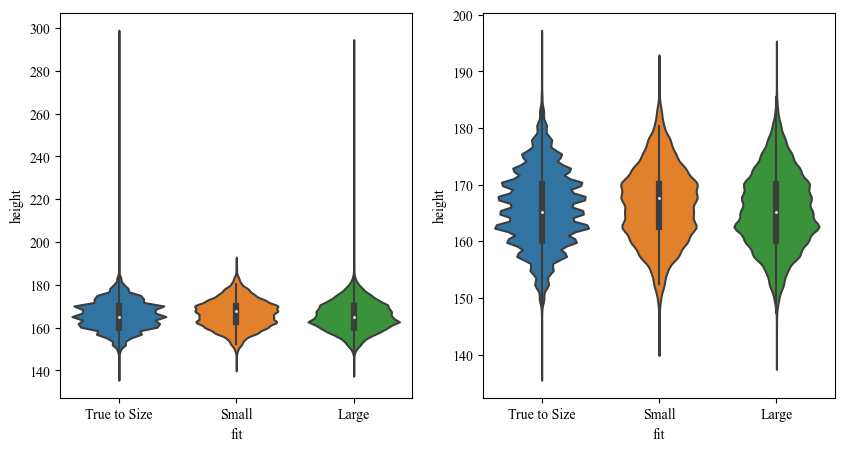

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.violinplot(x='fit', y='height', data=df, ax=ax[0])
# Drop outliers
df.drop(df[df.height > 200].index, inplace=True)
sns.violinplot(x='fit', y='height', data=df, ax=ax[1])

In [89]:
df.height.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    55981.000000
mean       165.940163
std          6.639065
min        137.160000
1%         152.400000
5%         154.940000
10%        157.480000
25%        162.560000
50%        165.100000
75%        170.180000
90%        175.260000
95%        177.800000
99%        180.340000
max        195.580000
Name: height, dtype: float64

## weight
-   All weights except `NaN` end with `LBS`. We convert them from pounds to kilograms.
-   Abnormal weights bigger than 150 kg or smaller than 30 kg are set to `NaN`.

In [110]:
df = train_df.copy()

In [111]:
df.weight = df.weight.astype(str, copy=False)

df[~df.weight.str.match(r'^\d+LBS$')].weight.value_counts()

nan    16109
Name: weight, dtype: int64

In [112]:
pos = df.weight.str.match(r'^\d+LBS$')
df.loc[~pos, 'weight'] = np.nan
# Convert pounds to kilograms
df.loc[pos, 'weight'] = df.weight[pos].str.extract(r'^(\d+)LBS$', expand=False)
df.weight = df.weight.astype(float, copy=False)
df.weight = df.weight * 0.45359237
df.weight.describe()

count    7.146700e+04
mean     2.704564e+05
std      8.374622e+06
min      4.535924e-01
25%      5.669905e+01
50%      6.304934e+01
75%      7.030682e+01
max      7.718560e+08
Name: weight, dtype: float64

In [113]:
df[df.weight < 30].sample(5)

,fit,item_name,size,price,user_name,rented_for,usually_wear,age,height,weight,body_type,bust_size,review_summary,review,rating
42884,Large,Monse\nRacing Stripe Plaid Top,2,$1490,Molly,Date,2,54,NaN,0.453592,HOURGLASS,32DD,Looks really cool can be styled so many ways,I rented because this garment cld be styled so...,2
83934,Large,Victor Alfaro Collective\nOversized Mock Neck ...,M,$270,Catherine,Work,6,56,"5' 4""",0.453592,PEAR,34C,NaN,Sleeves were huge but the torso fit fine. I di...,2
49569,True to Size,Hutch\nDeep V-neck Jumpsuit,4,$264,H. jeanie,NaN,4,45,"5' 0""",17.236510,HOURGLASS,36C,NaN,The material is really thin like swimwear mate...,1
18051,True to Size,MISA Los Angeles\nDivya Top,S,$238,Rebecca,Work,4,42,"5' 7""",24.947580,ATHLETIC,34B,"It is pretty and sexy, see through down the fr...",I got tons of compliments and the fit was snug...,5
16148,True to Size,J.Crew\nBonita Coat,4,$398,Sanndy,Other,2,3,"4' 6""",15.875733,NaN,32A,Love it .. I wished I purchased it,NaN,5


<AxesSubplot: xlabel='fit', ylabel='weight'>

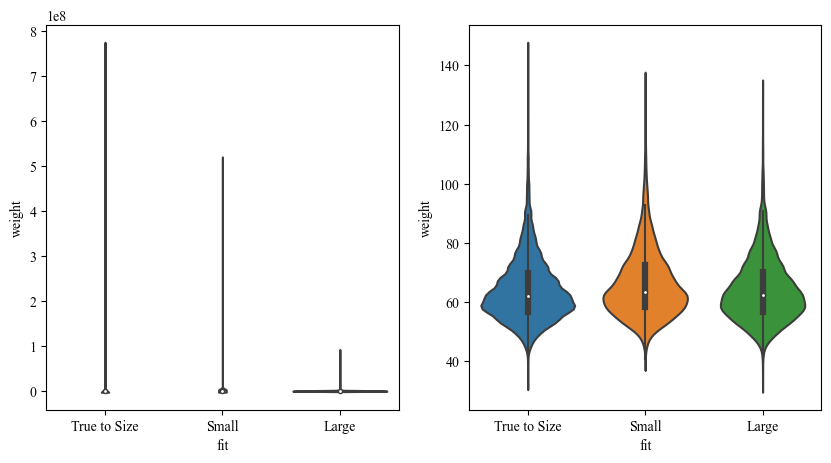

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.violinplot(x='fit', y='weight', data=df, ax=ax[0])
# Drop problematic values
df.drop(df[df.weight < 30].index, inplace=True)
df.drop(df[df.weight > 150].index, inplace=True)
sns.violinplot(x='fit', y='weight', data=df, ax=ax[1])

In [115]:
df.weight.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    70069.000000
mean        64.368311
std         10.673141
min         33.112243
1%          46.720014
5%          50.348753
10%         52.616715
25%         56.699046
50%         62.595747
75%         70.306817
90%         78.017888
95%         83.914588
99%         99.790321
max        145.149558
Name: weight, dtype: float64

<AxesSubplot: >

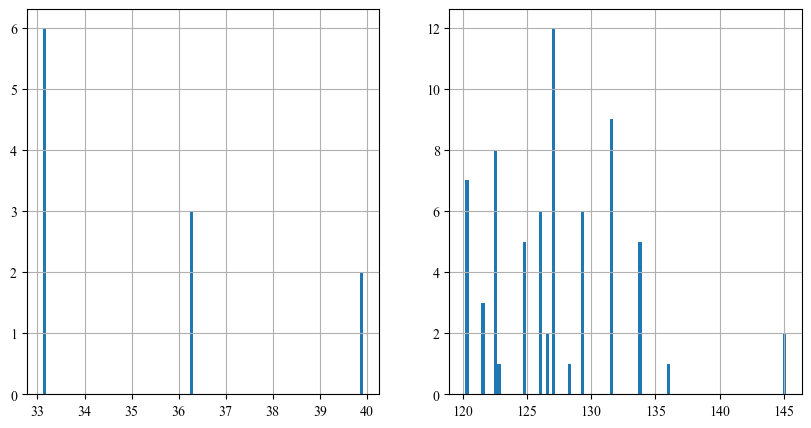

In [116]:
# Some possible outliers. We do not drop them.
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df[(30 < df.weight) & (df.weight < 40)].weight.hist(bins=100, ax=ax[0])
df[(120 < df.weight) & (df.weight < 150)].weight.hist(bins=100, ax=ax[1])

## bust_size

- A valid bust size contains two parts: a number in inches and a letter indicating the cup. See https://www.sizeguide.net/bra-sizes.html for more details.
  
  | CupSize | AA | A | B | C | D | DD | DDD/E | F | G | H |
  |---------------------|---|----|---|---|---|---|---|---|---|---|
  | BustSize – BandSize | 0 | <1 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |

  The above table shows one possible conversion from cup size to numerical value. We do not implement it in this notebook.


In [192]:
df = train_df.copy()

In [193]:
df.bust_size.unique()

array([nan, '36DD', '30A', '32D', '34B', '34DDD/E', '34A', '34DD', '34D',
       '32B', '42DDD/E', '36C', '32DD', '36B', '42G', '32C', '32A',
       '30DD', '34C', '38C', '32H', '36DDD/E', '36D', '36A', '38B',
       '38DD', '30H', '30C', '34F', '34J', '38DDD/E', '38G', '38D', '30F',
       '40B', '32DDD/E', '30B', '28B', '36G', '32G', '32F', '36H', '44DD',
       '30D', '32AA', '40D', '42F', '28A', '42B', '40C', '34AA', '42C',
       '30DDD/E', '34G', '28C', '28DD', '36AA', '44C', '40DD', '38A',
       '40F', '34H', '44D', '36F', '38F', '42DD', '40A', '42D', '40DDD/E',
       '44G', '40H', '30G', '46D', '28D', '30AA', '34D+', '40G', '36J',
       '38AA', '28AA', '48B', '28F', '28H', '36I', '32J', '32D+', '38J',
       '34I', '28J', '36D+', '28G', '38H', '44F', '40J', '48C', '44H',
       '28DDD/E', '32I', '42A', '40I', '46DDD/E', '38I', '44J', '44DDD/E',
       '44B', '44A', '46DD', '30J', '46C', '38D+'], dtype=object)

In [194]:
df.bust_size = df.bust_size.astype(str, copy=False)

df[~df.bust_size.str.match(r'^\d+[A-K].*$')].bust_size.value_counts()

nan    13815
Name: bust_size, dtype: int64

In [195]:
pos = df.bust_size.str.match(r'^\d+[A-K].*$')
df.loc[~pos, 'bust_size'] = np.nan
# Split the number and the letter
temp = df.bust_size[pos].str.extract(r'^(\d+)([A-K].*)$')
df.loc[pos, 'bust_size'] = temp[0]
df.bust_size = df.bust_size.astype(float, copy=False)
df['cup_size'] = np.nan
df.loc[pos, 'cup_size'] = temp[1]
df[['fit', 'bust_size', 'cup_size']].dropna().sample(5)


,fit,bust_size,cup_size
79682,True to Size,34.0,C
29028,True to Size,34.0,C
55423,True to Size,34.0,DDD/E
85352,True to Size,34.0,B
37144,True to Size,34.0,D


In [196]:
df.bust_size.describe()

count    73761.000000
mean        34.207535
std          2.018673
min         28.000000
25%         32.000000
50%         34.000000
75%         36.000000
max         48.000000
Name: bust_size, dtype: float64

<AxesSubplot: xlabel='fit', ylabel='bust_size'>

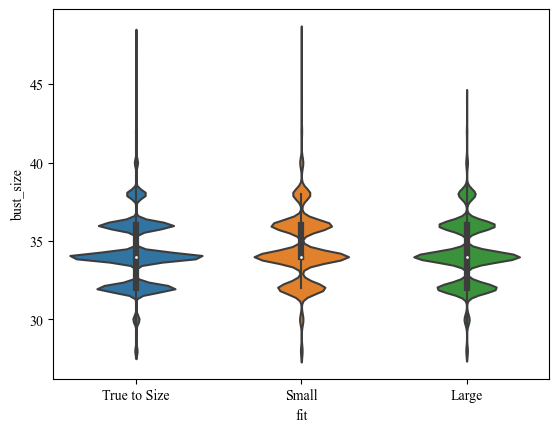

In [197]:
sns.violinplot(x='fit', y='bust_size', data=df)

### cup_size
- We treat cup size as an ordered categorical variable.

In [198]:
df.cup_size.unique()

array([nan, 'DD', 'A', 'D', 'B', 'DDD/E', 'C', 'G', 'H', 'F', 'J', 'AA',
       'D+', 'I'], dtype=object)

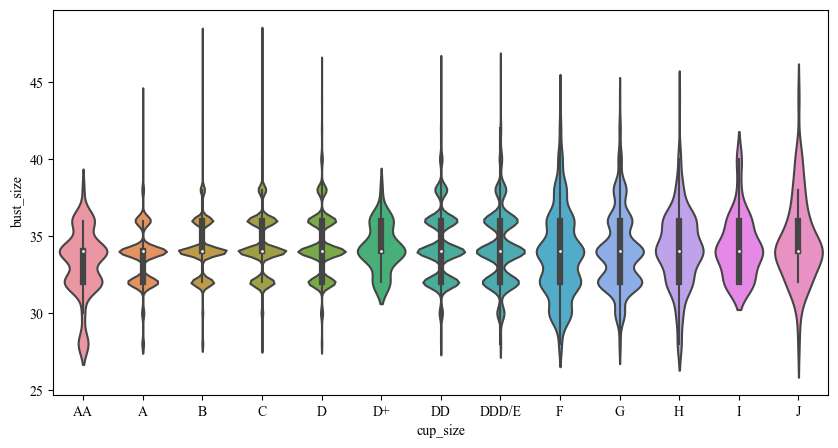

In [199]:
sns.violinplot(x='cup_size', y='bust_size', data=df, order='AA A B C D D+ DD DDD/E F G H I J'.split(), scale='width')
plt.gcf().set_size_inches(10, 5)

<AxesSubplot: xlabel='fit'>

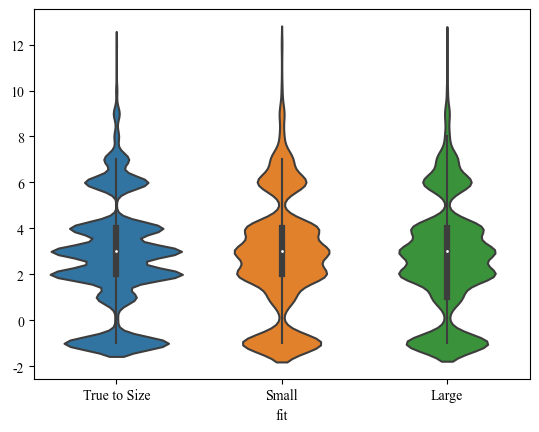

In [211]:
df.cup_size = df.cup_size.astype('category', copy=False)
df.cup_size = df.cup_size.cat.set_categories(
    'AA A B C D D+ DD DDD/E F G H I J'.split(), ordered=True)
sns.violinplot(x=df.fit, y=df.cup_size.cat.codes)

关联规则: 贫胸 --> Large 🤣

## body_type
- This column is relatively clean. We treat it as a categorical variable.

In [201]:
df.body_type = df.body_type.astype('category', copy=False)
df.body_type.cat.categories

Index(['APPLE', 'ATHLETIC', 'FULL BUST', 'HOURGLASS', 'PEAR', 'PETITE',
       'STRAIGHT & NARROW'],
      dtype='object')

## Functions
---

In [213]:
def height_to_cm(df: pd.DataFrame):
    '''
    Convert height from feet and inches to centimeters.
    Set invalid values to NaN.
    '''
    df.height = df.height.astype(str, copy=False)
    pos = df.height.str.match(r'^\d+\' \d+\"$')
    df.loc[~pos, 'height'] = np.nan
    # Convert feet and inches to centimeters
    temp = df.height[pos].str.extract(r'(\d+)\' (\d+)\"').astype(int,
                                                                 copy=False)
    df.loc[pos, 'height'] = (temp[0] * 12 + temp[1]) * 2.54
    df.height = df.height.astype(float, copy=False)
    # Set outliers (>200 cm) to NaN
    df.loc[df.height > 200, 'height'] = np.nan
    return df


def weight_to_kg(df: pd.DataFrame):
    '''
    Convert weight from pounds to kilograms.
    Set invalid values to NaN.
    '''
    df.weight = df.weight.astype(str, copy=False)
    pos = df.weight.str.match(r'^\d+LBS$')
    df.loc[~pos, 'weight'] = np.nan
    # Convert pounds to kilograms
    df.loc[pos, 'weight'] = df.weight[pos].str.extract(r'^(\d+)LBS$',
                                                       expand=False)
    df.weight = df.weight.astype(float, copy=False)
    df.weight = df.weight * 0.45359237
    # Set outliers (<30 kg or >150 kg) to NaN
    df.loc[df.weight < 30, 'weight'] = np.nan
    df.loc[df.weight > 150, 'weight'] = np.nan
    return df


def bust_size_split(df: pd.DataFrame):
    '''
    Split bust_size into 2 features:
        - bust_size: number part in inches, as float
        - cup_size: letter part, as ordinal category
    '''
    df.bust_size = df.bust_size.astype(str, copy=False)
    pos = df.bust_size.str.match(r'^\d+[A-K].*$')
    df.loc[~pos, 'bust_size'] = np.nan
    # Split the number and the letter
    temp = df.bust_size[pos].str.extract(r'^(\d+)([A-K].*)$')
    df.loc[pos, 'bust_size'] = temp[0]
    df.bust_size = df.bust_size.astype(float, copy=False)
    df['cup_size'] = np.nan
    df.loc[pos, 'cup_size'] = temp[1]
    df.cup_size = df.cup_size.astype('category', copy=False)
    df.cup_size = df.cup_size.cat.set_categories(
        'AA A B C D D+ DD DDD/E F G H I J'.split(), ordered=True)
    return df


def body_type_to_cat(df: pd.DataFrame):
    '''
    Convert body_type to category.
    '''
    df.body_type = df.body_type.astype('category', copy=False)
    return df

### Results

In [223]:
new_train_df = train_df.copy()
new_train_df = height_to_cm(new_train_df)
new_train_df = weight_to_kg(new_train_df)
new_train_df = bust_size_split(new_train_df)
new_train_df = body_type_to_cat(new_train_df)
new_train_df[['height', 'weight', 'bust_size', 'cup_size', 'body_type']].sample(5)

,height,weight,bust_size,cup_size,body_type
19284,154.94,56.699046,32.0,C,PETITE
55088,165.10,63.502932,34.0,B,PEAR
48903,165.10,NaN,32.0,D,NaN
1371,162.56,57.606231,34.0,C,ATHLETIC
86526,165.10,NaN,NaN,NaN,NaN


In [224]:
new_train_df[['height', 'weight', 'bust_size', 'cup_size', 'body_type']].describe()

,height,weight,bust_size
count,55981.000000,70069.000000,73761.000000
mean,165.940163,64.368311,34.207535
std,6.639065,10.673141,2.018673
min,137.160000,33.112243,28.000000
25%,162.560000,56.699046,32.000000
50%,165.100000,62.595747,34.000000
75%,170.180000,70.306817,36.000000
max,195.580000,145.149558,48.000000


In [225]:
new_train_df[['height', 'weight', 'bust_size', 'cup_size', 'body_type']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87576 entries, 0 to 87765
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   height     55981 non-null  float64 
 1   weight     70069 non-null  float64 
 2   bust_size  73761 non-null  float64 
 3   cup_size   73761 non-null  category
 4   body_type  61062 non-null  category
dtypes: category(2), float64(3)
memory usage: 2.8 MB
